In [1]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [2]:
!pip install -q keras


In [3]:
import keras,os
from keras.models import Sequential
#  Sequential from keras.models,  This gets our neural network as Sequential network.
#  As we know, it can be sequential layers or graph

In [4]:
from keras.layers import Conv2D
# We are working with images. All the images are basically 2D.
# One can go with the 3D if working with videos.

from keras.layers import MaxPool2D
# Average Pooling, Sum Pooling and Max Pooling are there.
# We choose Max pooling. Re collect all what I taught you. from keras.layers import  


from keras.layers import Flatten
# Well, we must flatten. It is the process of converting all the resultant 2D arrays as single long continuous linear vector.
# This is mandatory, folks.

from keras.layers import Dense
# This is the last step! Yes, full connection of the neural network is performed with this Dense.

from keras.preprocessing.image import ImageDataGenerator
# We are going to use ImageDataGenerator from Keras and hence import it as well! It helps in rescale, rotate, zoom, flip etc.

import numpy as np
# Yes, Numpy matters too!



In [5]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='/content/drive/MyDrive/Resized Google Colab/Train',target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory='/content/drive/MyDrive/Resized Google Colab/Test', target_size=(224,224))
# Can we assign the test and training images. As usual, we can take 70/30

                                        # Section 2 - Convolution/Pooling/Flattening/Dense



Found 822 images belonging to 5 classes.
Found 259 images belonging to 5 classes.


In [6]:
print(len(traindata))

26


In [7]:
VGG = keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
VGG.trainable = False
#model = Sequential()
# Can we initialize the CNN and start the real coding
# Here, What we are basically doing here is taking the 2-D array,
# i.e pooled image pixels and converting them to a one dimensional single vector.

# We have 1 x Dense layer of 4096 units
# We have 1 x Dense layer of 4096 units
# We have 1 x Dense Softmax layer of 2 units


58892288/58889256 [==============================] - 2s 0us/step


In [8]:
model = keras.Sequential([
  VGG,
  keras.layers.Flatten(),
  keras.layers.Dense(units=256,activation="relu"),
  keras.layers.Dense(units=256,activation="relu"),
  keras.layers.Dense(units=5, activation="softmax")
])
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
# Can we compile??
# Specify all the arugyments, metrics clearly.



In [9]:
model.summary()
# We get a summary out here. It is a table, folks!

hist = model.fit_generator(steps_per_epoch=12,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10)
model.save('vggclf.h5')



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,204,549
Trainable params: 6,489,861
Non-trainable params: 14,714,688
_________________________________________________________________
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
12/12 [========

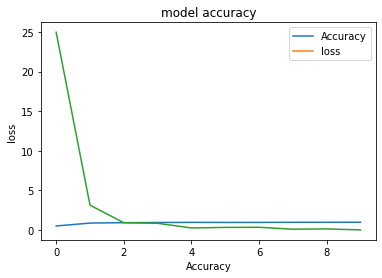

In [10]:
# Can we visualize?
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("Accuracy")
plt.legend(["Accuracy","loss"])
plt.show()



In [ ]:
print(max(output))

Sheep


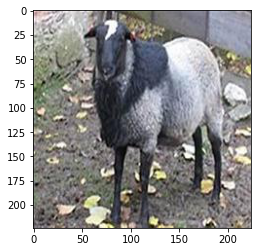

In [15]:
# We can test with first input image - It is dog!
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Resized Google Colab/Train/sheep/57 (10)_output.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vggclf.h5")
output = saved_model.predict(img)
x=max(output[0][0],output[0][1],output[0][2],output[0][3],output[0][4])
if x==output[0][0]:
  print('cat')
elif x==output[0][1]:
  print('Dog')
elif x==output[0][2]:
  print('Elephant')
elif x==output[0][2]:
  print('Horse')
else:
  print('Sheep')

In [ ]:
if output[0][0] > output[0][1]:
  if output[0][0]>output[0][2]
    print("cat")
elif output[0][0]>output[0][2]
    print('dog')